WINE QUALITY

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LogisticRegression


In [3]:
df=pd.read_csv("winequality-red - winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(240)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


<Axes: >

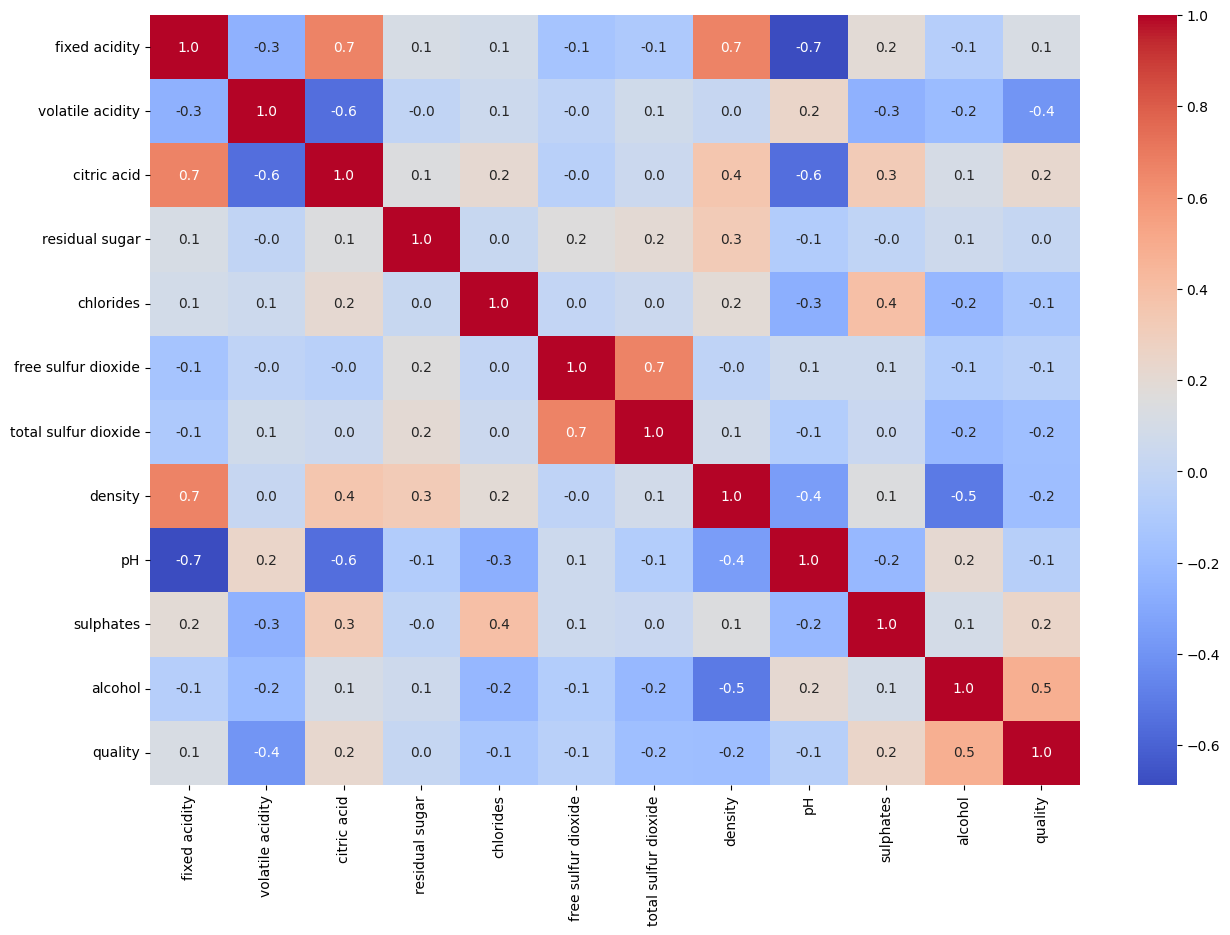

In [9]:
plt.figure(figsize=(15,10))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm',fmt='0.01f')

In [10]:
corr_matrix=df.corr()

#set the correlation threshold
threshold=0.5

# Find pairs of features with high correlation 
highly_correlated_pairs=[]
for i in range (len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j])>threshold:   #check if the absolute correlation exceeds the threshold
            highly_correlated_pairs.append((corr_matrix.columns[i],corr_matrix.columns[j]))


#Print all pairs of highly correlated features
print(highly_correlated_pairs)

[('citric acid', 'fixed acidity'), ('citric acid', 'volatile acidity'), ('total sulfur dioxide', 'free sulfur dioxide'), ('density', 'fixed acidity'), ('pH', 'fixed acidity'), ('pH', 'citric acid'), ('alcohol', 'density')]


In [11]:
df.drop(['fixed acidity'],axis=1,inplace=True)

In [12]:
x=df.drop(['quality'],axis=1)
y=df[['quality']]

In [13]:
df['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [15]:
model=DecisionTreeRegressor(criterion='squared_error',max_depth=20,min_samples_split=2)   

In [16]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=20)

In [17]:
y_pred=model.predict(x_test)

In [18]:
mae=mean_absolute_error(y_test,y_pred) 
mse=mean_squared_error(y_test,y_pred)     
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print(f"mean absolute error (MAE): {mae:,.2f}")
print(f"mean squared error (MSE):{mse:,.2f}")
print(f"root mean squared error (RMSE) :{rmse:,.2f}")
print(f"r2 score: {r2:,.2f}")

mean absolute error (MAE): 0.63
mean squared error (MSE):0.87
root mean squared error (RMSE) :0.93
r2 score: -0.23


In [19]:
from sklearn.model_selection import GridSearchCV

grid_srch={'criterion':['absolute_error', 'friedman_mse', 'squared_error', 'poisson'],
           'max_depth':[3,5,7,10],
           'min_samples_split':[2,5,10,15]}

grid=GridSearchCV(DecisionTreeRegressor(random_state=42),grid_srch,cv=3  ,scoring='r2',n_jobs=-1,verbose=2)
grid.fit(x_train,y_train)

print("Best parameters:",grid.best_params_)
print("Best Accuracy:",grid.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best parameters: {'criterion': 'poisson', 'max_depth': 3, 'min_samples_split': 2}
Best Accuracy: 0.2396542324863915


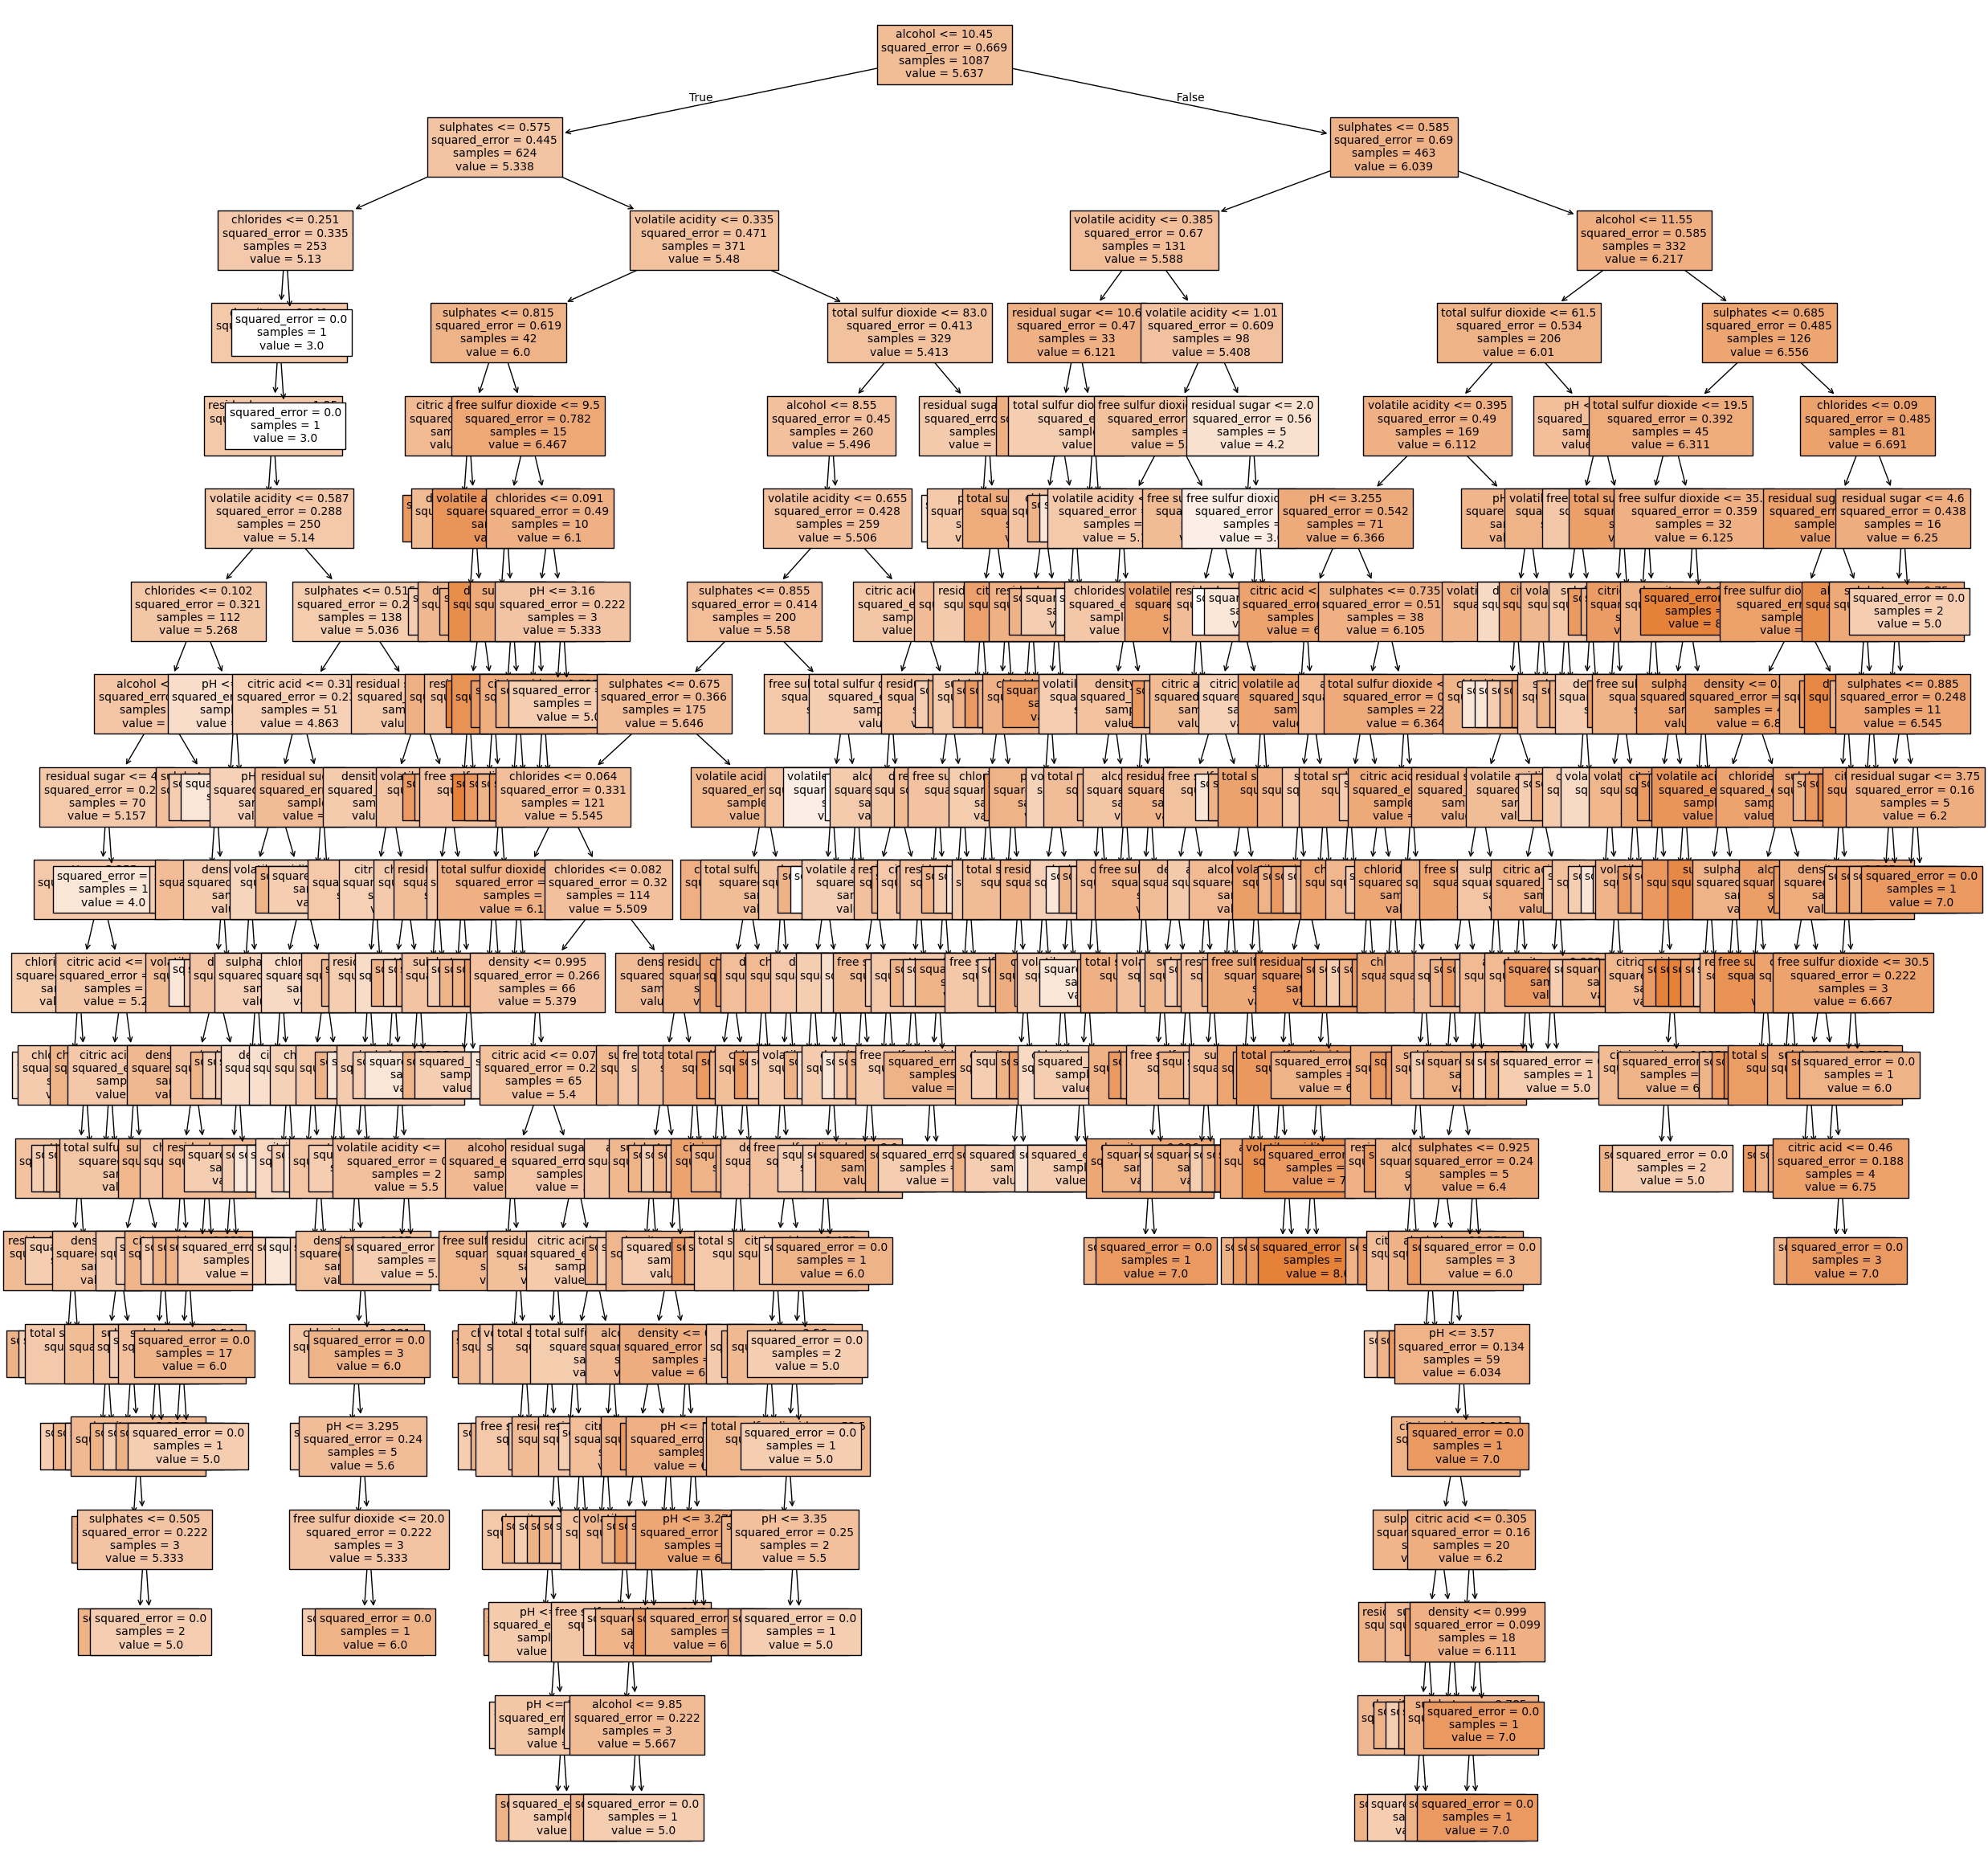

In [23]:
from sklearn import tree

plt.figure(figsize=(30,30))
tree.plot_tree(model,filled=True,fontsize=10,feature_names=x.columns)
plt.show()